<a href="https://colab.research.google.com/github/marcelotournier/stable-diffusion-XL/blob/main/02_stable_diffusion_XL_gerar_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerar imagens com modelos personalizados de Stable Diffusion XL
Esse notebook serve para gerar imagens de modelos personalizados do Stable Diffusion XL.

# Instruções:
1. Carregue o arquivo `pytorch_lora_weights.safetensors` gerado pelo notebook `01_treinar-stable-diffusion-xl.ipynb` do seu computador local para a pasta principal desse notebook colab
2. Rode todas as células desse notebook para ver as imagens ao final. Não esqueça de fazer o download das imagens que você quiser guardar, pois o colab deleta todos os arquivos quando a sessão se encerra
3. Para modificar as imagens, modifique o texto entre aspas da variável `PROMPT` abaixo. Para que o prompt funcione, ele precisa sempre começar com a frase `a portrait of sks person` (ou o prompt personalizado que você usou no notebook 01.

Para sugestões de prompts, você pode pedir ao ChatGPT algumas dicas, no meu caso funcionaram relativamente bem.

In [ ]:
!pip install transformers diffusers accelerate --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00


In [ ]:
MODEL = "stabilityai/stable-diffusion-xl-base-1.0"
DEVICE = "cuda" # use "cuda" para GPUs NVIDIA ou "mps" para Macs M1/M2
LORA_MODEL_PATH = "."
LORA_MODEL_FILENAME = "pytorch_lora_weights.safetensors"
NUM_INFERENCE_STEPS = 20
NUM_IMAGES_GENERATED = 10

'a portrait of sks person Compose a dynamic superhero portrait that radiates strength and character. Capture their iconic stance, intricate costume details, and intense expression. Use vivid colors and masterful shading to bring their unique powers and persona to life.'

In [ ]:
import random
import torch
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline



pipe = DiffusionPipeline.from_pretrained(MODEL,
                                         torch_dtype=torch.float16,)

pipe.to(DEVICE)

pipe.load_lora_weights(LORA_MODEL_PATH,
                       weight_name=LORA_MODEL_FILENAME,
                       )

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Modifique a variável `PROMPT` abaixo para personalizar e gerar imagens

In [ ]:
PROMPT = "a portrait of sks person Transform me into an embodiment of Iron Man's persona. Merge sleek armor, advanced technology, and charismatic confidence. Craft a dynamic portrait that captures the essence of a modern-day superhero with a touch of Stark's innovation."

# Ex: Superman
# "a portrait of sks person Compose a dynamic superhero portrait that radiates strength and character. Capture their iconic stance, intricate costume details, and intense expression. Use vivid colors and masterful shading to bring their unique powers and persona to life."

# Ex: output colorido
# "a portrait of sks person expressing the evolving dance of vibrant colors, intertwining and diffusing on canvas. Create a harmonious masterpiece that invites viewers to get lost in its kaleidoscope. Illuminate the intricate pathways where colors merge, in a moment of timeless elegance"

gerando imagem 0


  0%|          | 0/20 [00:00<?, ?it/s]

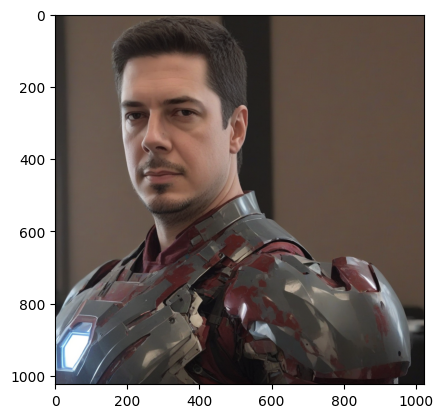

imagem gerada e salva no arquivo imagem_gerada_0.png
gerando imagem 1


  0%|          | 0/20 [00:00<?, ?it/s]

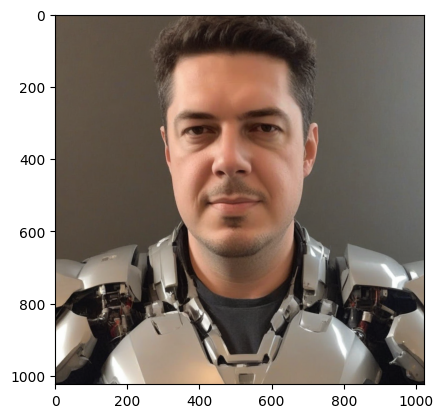

imagem gerada e salva no arquivo imagem_gerada_1.png
gerando imagem 2


  0%|          | 0/20 [00:00<?, ?it/s]

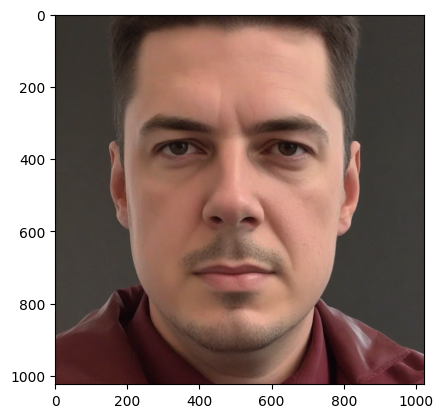

imagem gerada e salva no arquivo imagem_gerada_2.png
gerando imagem 3


  0%|          | 0/20 [00:00<?, ?it/s]

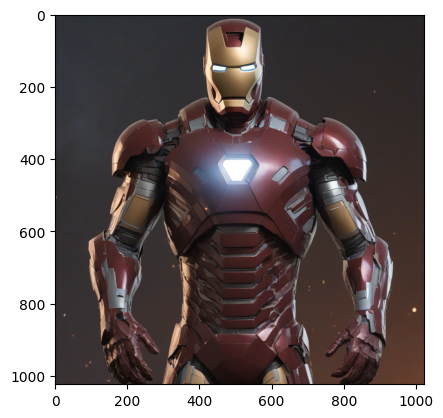

imagem gerada e salva no arquivo imagem_gerada_3.png
gerando imagem 4


  0%|          | 0/20 [00:00<?, ?it/s]

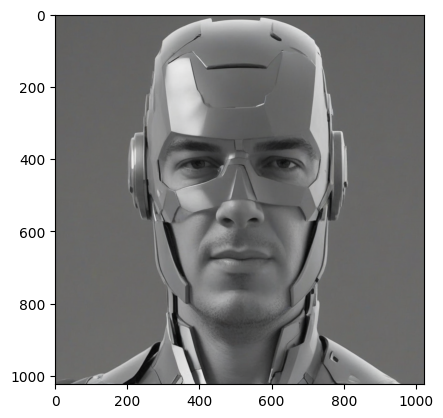

imagem gerada e salva no arquivo imagem_gerada_4.png
gerando imagem 5


  0%|          | 0/20 [00:00<?, ?it/s]

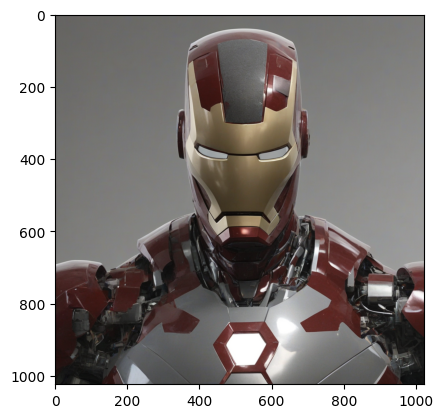

imagem gerada e salva no arquivo imagem_gerada_5.png
gerando imagem 6


  0%|          | 0/20 [00:00<?, ?it/s]

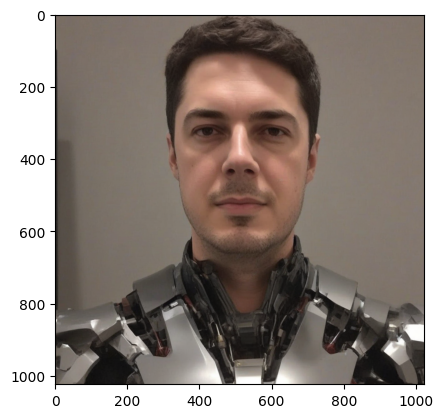

imagem gerada e salva no arquivo imagem_gerada_6.png
gerando imagem 7


  0%|          | 0/20 [00:00<?, ?it/s]

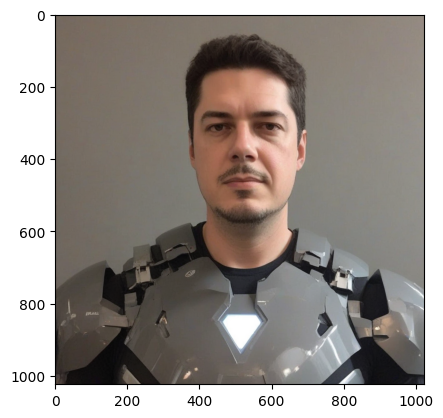

imagem gerada e salva no arquivo imagem_gerada_7.png
gerando imagem 8


  0%|          | 0/20 [00:00<?, ?it/s]

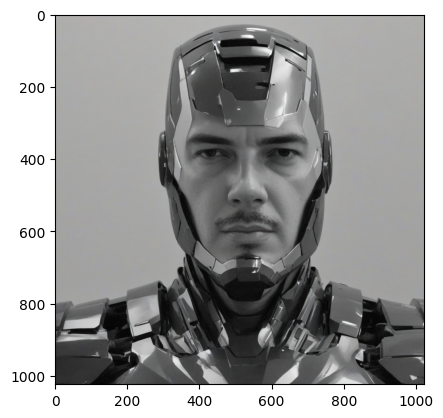

imagem gerada e salva no arquivo imagem_gerada_8.png
gerando imagem 9


  0%|          | 0/20 [00:00<?, ?it/s]

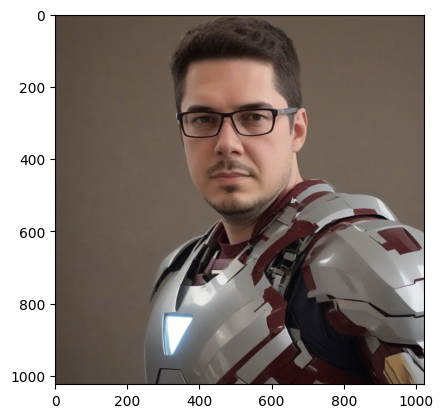

imagem gerada e salva no arquivo imagem_gerada_9.png


In [ ]:
# Gerando imagens:
for seed in range(NUM_IMAGES_GENERATED):
    print(f"gerando imagem {seed}")
    generator = torch.Generator(DEVICE).manual_seed(seed) # + 120301203)
    image = pipe(prompt=PROMPT,
                 generator=generator,
                 num_inference_steps=NUM_INFERENCE_STEPS)
    image = image.images[0]
    plt.imshow(image)
    plt.show()
    image_filename = f"imagem_gerada_{seed}.png"
    print(f"imagem gerada e salva no arquivo {image_filename}")
    image.save(image_filename)